Alex Weseley alw269

# Info 3950 Problem Set 3

**due Tue evening 7 Mar 2023 23:00**

Remember to include your name and netid in the first cell.

Submit via [gradescope](https://gradescope.com/).<br>
Remember to save your notebook before uploading, and then after uploading click the code button on gradescope to verify that your notebook renders properly, and is your latest version.

<font size="-1">[Also note that these problem sets are not intended as group projects: the work you submit must be your own. You can discuss with other students at a high level, for example general methods or strategies to solve a problem, but you must cite the other student(s) in your submission. Any work you submit must be your own understanding of the solution, the details of which you personally and individually worked out, and written in your own words. In no cases should notebooks or code be shared.]</font>

## 1) logistic regression, Challenger data

[For additional introduction to scikit-learn, see
[05.02-introducing-scikit-learn](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html) (Vanderplas)]

**A.**
Redo the fit of the logistic parameters from
[lec9_logistic.ipynb](https://nbviewer.jupyter.org/url/courses.cit.cornell.edu/info3950_2023sp/lec9_logistic.ipynb)
using [sklearn.linear_model.LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
(see also [plot_logistic](http://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html)).

There are two minor subtleties:<br>
     $\quad\bullet$ For the xdata the scikit learn functions expect multi-dimensional data, so one-dimensional temperature data `[70, 57, 63, 70, 53, ...]` would instead have to be in the form `[[70], [57], [63], [70], [53], ...]`, which can be created from the lists above via `X = np.array(xdata)[:, None]`, i.e., adding an empty second dimension to each data point (or via `X=[[x] for x in xdata]`. The attributes `.coef_` and `.intercept_` of the fitted logistic classifier give respectively `a` and `-a*t0`, since they appear as `(coef *t + intercept) = a*(t - t0)` in the argument of the exponential.<br>
     $\quad\bullet$ By default scikit-learn's `LogisticRegression()` comes with a "regularization" parameter `C` turned on, to prevent overfitting by constraining the parameters to be small. That isn't a concern here with only two parameters, so the regularization can be disabled by initializing with a large value of `C`, e.g., `LogisticRegression(C=1e6)`. You can also increase the accuracy of the result by lowering the tolerance from the default to, say, `tol=1e-6` (though that may require increasing `max_iter`).  [We'll cover regularization more carefully after the break, and with a problem on ps4.]

You should find slightly different values for `a` and `t0` than found using the coarse grid -- check that they give a slightly better fit in the sense that they give a slightly higher probability of the data.

In [1]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fail_data = np.array([70, 57, 63, 70, 53, 75, 58])
success_data = np.array([66, 69, 68, 67, 72, 73, 70, 78, 67, 67, 75, 70, 81, 76, 79, 76])

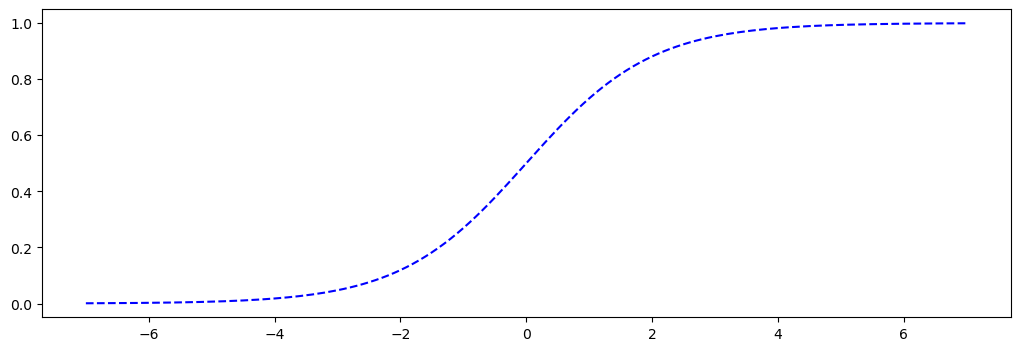

In [3]:
def p(t, a=1., t0=0.): return 1 / (1 + np.exp(-a*(t-t0))) #lecture 9 code
plt.figure(figsize=(12.5,4))
xr=np.arange(-7.,7.1,.1)
plt.plot(xr, p(xr), 'b--');

In [4]:
clf = LogisticRegression(tol = 1e-6, C=1e6)

In [5]:
y = np.append(np.ones(len(success_data)), np.zeros(len(fail_data)))[:,None]

In [6]:
len(y)

23

In [7]:
X = np.append(success_data, fail_data)[:,None]

In [8]:
len(X)

23

In [9]:
clf.fit(X,y)

/Users/alexweseley/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1000000.0, tol=1e-06)

In [10]:
def logit(x): return 1 / (1 + np.exp(-x))

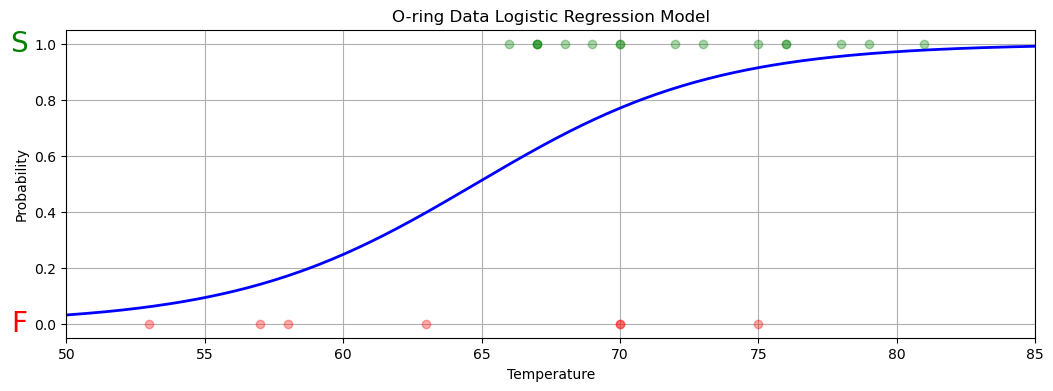

In [11]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html
# lecture 9 code

X_test = np.linspace(50, 85, 300)

loss = logit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.figure(figsize=(12.5,4))
plt.plot(X_test, loss, label="Logistic Regression Model", color="blue", linewidth=2)
plt.title("O-ring Data Logistic Regression Model")
plt.xlabel("Temperature")
plt.ylabel("Probability")
plt.xlim(50,85)
plt.text(-.04,.93,'S', transform=plt.gca().transAxes, fontsize=20, c='g', ha='right')
plt.text(-.04,.02,'F', transform=plt.gca().transAxes, fontsize=20, c='r', ha='right')

plt.plot(success_data, np.ones(len(success_data)), 'go',
        fail_data, np.zeros(len(fail_data)), 'ro', alpha=.33)
plt.grid('on')

plt.show()

In [12]:
clf.intercept_/-clf.coef_, clf.coef_

(array([[64.79464085]]), array([[0.23216274]]))

In [13]:
def logprob(a,t0):
   return np.log(p(success_data, a, t0)).sum() + np.log(1-p(fail_data, a, t0)).sum()

In [14]:
ar = np.arange(.01, 1., .001)
t0r = np.arange(50, 85.001, .1)

logprobs = np.array([[logprob(a,t0) for t0 in t0r] for a in ar])

In [15]:
new_max_prob = logprobs.max()
print("Highest probability of data", round(new_max_prob, 5), "Found at indices", np.argwhere(logprobs==logprobs.max()))

Highest probability of data -10.1576 Found at indices [[222 148]]


In [16]:
old_max_prob = logprob(.24, 65)
print("Old highest probability (coarse grid)", round(old_max_prob,5))

Old highest probability (coarse grid) -10.16112


In [17]:
diff = new_max_prob - old_max_prob
print('Difference in probabilities:', round(diff, 5))

Difference in probabilities: 0.00352


**B.**
Redraw the right hand contour plot in cell [14] of [lec9_logistic.ipynb](https://nbviewer.jupyter.org/url/courses.cit.cornell.edu/info3950_2023sp/lec9_logistic.ipynb)
(the plot after the markdown cell "They're peaked fairly strongly in the neighborhood of the maximum:"), but with a finer grid to show the position of the best value found by the sklearn algorithm.  Also plot a point showing as above the location of the former best maximum found in problem lec9_logistic, it might looks something like the fake data below:

In [18]:
a = round(ar[222],3)
a

0.232

In [19]:
t0 = t0r[148]
round(t0, 3)

64.8

In [20]:
pprobs = np.exp(logprobs) / np.exp(logprobs).sum()  #now consider normalized posterior probs

a_avg = np.average([[a for t0 in t0r] for a in ar], weights=pprobs)  #weighted average
t0_avg = np.average([[t0 for t0 in t0r] for a in ar], weights=pprobs)

print ('a_avg={:.3f},  t0_avg={:.2f}'.format(a_avg, t0_avg))

a_avg=0.236,  t0_avg=63.82


In [21]:
len(pprobs)

990

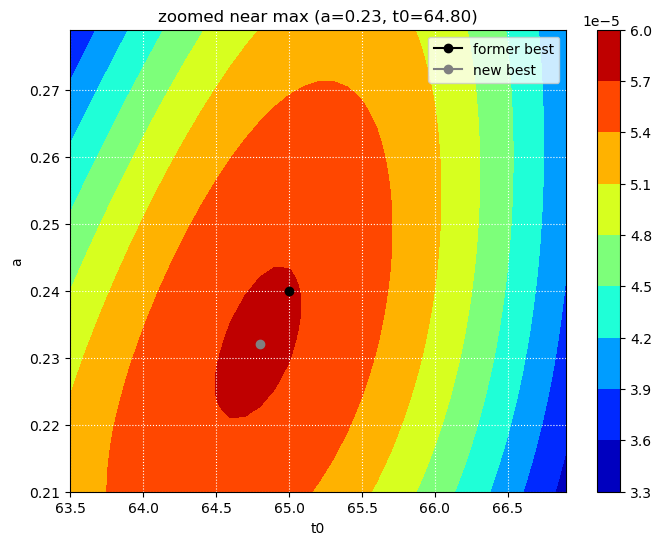

In [22]:
#look directly at the overall probability of the data for all values of t0, a
plt.figure(figsize=(8, 6))

plt.contourf(t0r[135:170], ar[200:270], pprobs[200:270,135:170], cmap='jet')
plt.grid('on', color='w', linestyle='dotted')
plt.title('zoomed near max (a={:.2f}, t0={:.2f})'.format(ar[222], t0r[148]))
plt.xlabel('t0'), plt.ylabel('a')
plt.plot([65], [.24], marker='o', color = 'black', label='former best')
plt.plot(t0r[148], ar[222], marker='o', color = 'grey', label='new best')
plt.legend()
plt.colorbar();

**C.** Use the `.score()` method to determine how many of the points the trained classifier gets wrong on the training set. What are the X and y values of those points (temperatures and training values)?

In [23]:
n_correct = clf.score(X, y) * 23
f"The classifier misclassified {23 - n_correct} points in the training set with an accuracy of {round(clf.score(X,y)*100,2)}%"

'The classifier misclassified 3.0 points in the training set with an accuracy of 86.96%'

In [24]:
training_accuracy = clf.predict(X) != y.flatten()

In [25]:
incorrect_indices = np.argwhere(training_accuracy == True)

In [26]:
print("X values: ", X[incorrect_indices].flatten(), "\nY values: ", np.zeros(3).flatten())

X values:  [70 70 75] 
Y values:  [0. 0. 0.]


In [27]:
# from IPython.display import Image
# Image(filename='fakemax.png')

## 2) OVR regression and adversarial digit recognition


[Some of what is requested is already implemented in the lec10_digits.ipynb notebook used in class. We'll return to discuss a bit more about multinomial logistic regression after the break, and ps4 will continue this example with a 'multinomial' version of the logistic classifier, rather than the 'ovr' = "one versus rest"]

In the [digits_classification_exercise](http://scikit-learn.org/stable/auto_examples/exercises/plot_digits_classification_exercise.html) discussed in class (see [lec10_digits.ipynb](https://nbviewer.jupyter.org/url/courses.cit.cornell.edu/info3950_2023sp/lec10_digits.ipynb)), [logistic regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) was used to classify 8x8 images of handwritten digits.

**A.** First train the logistic regression `logreg_ovr` as in the digits.ipynb notebook (using same training and test set). Check that you get the same .938888 = 169/180 score, meaning that it gets 11 of the 180 test images incorrect.  [you need to have `multi_class='ovr'` as an argument to `LogisticRegression()`, as discussed in class]. What are the indices of the `X_test array` corresponding to the ones that it gets wrong? Visualize those 11 to see why they might be ambiguous

In [28]:
# Your visualization might look something like this, but with all eleven filled in:

In [29]:
from sklearn import datasets, neighbors, linear_model

In [30]:
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

In [31]:
len(digits.DESCR)

2028

In [32]:
plt.matshow?

Signature: plt.matshow(A, fignum=None, **kwargs)
Docstring:
Display an array as a matrix in a new figure window.

The origin is set at the upper left hand corner and rows (first
dimension of the array) are displayed horizontally.  The aspect
ratio of the figure window is that of the array, unless this would
make an excessively short or narrow figure.

Tick labels for the xaxis are placed on top.

Parameters
----------
A : 2D array-like
    The matrix to be displayed.

fignum : None or int or False
    If *None*, create a new figure window with automatic numbering.

    If a nonzero integer, draw into the figure with the given number
    (create it if it does not exist).

    If 0, use the current axes (or create one if it does not exist).

    .. note::

       Because of how `.Axes.matshow` tries to set the figure aspect
       ratio to be the one of the array, strange things may happen if you
       reuse an existing figure.

Returns
-------
`~matplotlib.image.AxesImage`

Other Param

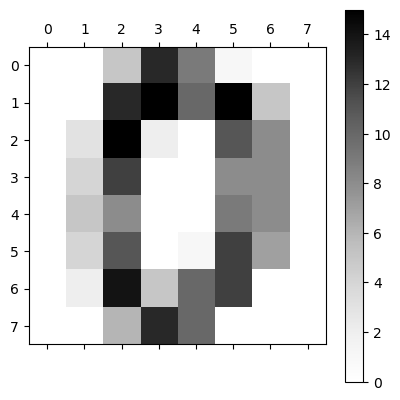

In [33]:
plt.matshow(X_digits[0].reshape(8,8),cmap='Greys')
plt.colorbar();

In [34]:
y_digits[999]

3

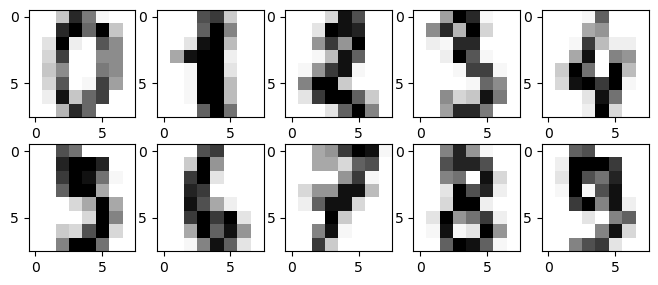

In [35]:
plt.figure(figsize=(8,3.2))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_digits[i].reshape(8,8),cmap='Greys')

In [36]:
n_samples = len(X_digits)

f = int(.9 * n_samples)
print ('90% = first', f, 'samples of', n_samples)

X_train = X_digits[:f] #first 90%
y_train = y_digits[:f]

X_test = X_digits[f:]  #last 10%
y_test = y_digits[f:]

90% = first 1617 samples of 1797


In [37]:
logreg_ovr = LogisticRegression(multi_class='ovr', max_iter = 10000)

In [38]:
logreg_ovr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='ovr')

In [39]:
print(f'model accuracy on test set: {np.around(logreg_ovr.score(X_test, y_test),5)}')

model accuracy on test set: 0.93889


In [40]:
accuracy_matrix = logreg_ovr.predict(X_test) != y_test
print(f'number of incorrect predictions in test set: {np.sum(accuracy_matrix)}')

number of incorrect predictions in test set: 11


incorrect indices:  [ 11  41  43  71  73 109 110 112 113 130 148] 



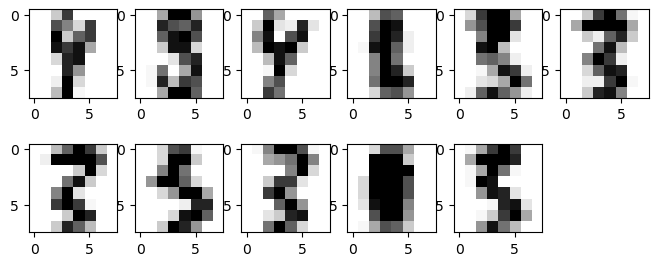

In [41]:
incorrect_indices = np.argwhere(accuracy_matrix == True)
index_range = incorrect_indices.flatten()
print("incorrect indices: ", index_range, "\n")

plt.figure(figsize=(8,3.2))
for i,k in enumerate(index_range):
    plt.subplot(2, 6, i+1)
    plt.imshow(X_test[k].reshape(8,8),cmap='Greys')

**B.** Consider$^*$ the three images `test3 = [X_test[i].copy() for i in (11, 43, 113)]`. Check that those are ones that the classifier gets wrong. Below you will manipulate a single pixel of the three images to cause the classifier to agree with the label. The first two are labelled as 4, and the last as 3.

$^*$Note the use of `np.copy()` in the above. If `a` is an array and you let `b=a` then set say `b[2]=0` that  also will change the value of `a[2]` to 0, because python works at the level of pointers and `b` and `a` point to the same data. This will not happen if you use instead `b=a.copy()`. To permit manipulating the images without affecting originals, the above populates `test3` with copies of the arrays.

In [42]:
# three of the misclassified images

Recall that `logreg_ovr.predict(test3)` will give the predictions for each of the three, `y_test[[11, 43, 113]]` will give their labelled values, and `logreg_ovr.predict_proba(test3)` will give the ten probabilities that they're each of the ten digits. (The `.predict()` method picks the label with the highest probability, as discussed in class.)

One way to manipulate the third image to be classified instead as 3 would be to look at the associated weights. `logref_ovr.coef_` is an array of shape `(10,64)`, and each row is an array of 64 weights that multiply the corresponding pixel values. (These weights are called $\vec w_i$ in the [lec10_slides.pdf](https://courses.cit.cornell.edu/info3950_2023sp/lec10_slides.pdf) notes.) `logref_ovr.intercept_` is an array of `10` numbers that provide the thresholds for each of the 10 "one versus rest" classifiers (0 or not 0, 1 or not 1, ...), and are added in turn to the corresponding sum of products of weights and features for each digit. (These are called $b_i$ in the formula $x_i = \vec w_i \cdot \vec f + \vec b_i$ in the lec10 slides.) Thus `logreg_ovr.coef_[3]` gives the 64 weights used in the "3 or not 3" classifier.  Identify the largest weight and see if the corresponding pixel in the image is already large (the max value is 16). If it is not already large, then see what happens when you increase its value. Otherwise look for the most negative weight, see if that corresponding pixel has a large value, and check what happens if you decrease it. Either way should make it more likely for the image to be classified as a 3. (Or you could notice that the third image is currently classified as a 8, look instead at `logreg_ovr.coef_[8]`, and to make that *less* likely either decrease the value of a pixel that has a large positive weight, or increase the value of a pixel that has a large negative weight. Again remember that pixel values are integers only in the range 0,1,2,...,15,16 ). In all cases you should use the smallest change in the pixel value to produce the desired effect.

i) Find (at least one) single pixel manipulation of each of the first two images that correct the predictions from 9 to 4.  Visualize the  images, indicating the location of the altered pixel in each. [See note added below]

In [43]:
test3 = [X_test[i].copy() for i in (11, 43, 113)]
# print(test3)
print(f'predicted values: {logreg_ovr.predict(test3)}')
print(f'labelled values: {y_test[[11, 43, 113]]}')
logreg_ovr.predict_proba(test3)

predicted values: [9 9 8]
labelled values: [4 4 3]


array([[1.01716842e-11, 4.60202971e-02, 1.48088016e-07, 6.90320064e-18,
        2.40501417e-01, 1.03353824e-07, 6.03741117e-12, 1.98311862e-06,
        2.59839174e-02, 6.87492134e-01],
       [5.71700787e-12, 1.42300865e-10, 3.04959979e-09, 1.80531089e-17,
        2.77002482e-01, 3.37644148e-09, 1.55607828e-11, 4.83153495e-08,
        3.54430257e-01, 3.68567206e-01],
       [4.65229929e-11, 1.79846388e-10, 2.19622426e-08, 2.65011168e-04,
        2.17732323e-15, 4.58989380e-08, 6.34963966e-16, 5.70887475e-10,
        9.99734767e-01, 1.52963531e-07]])

In [44]:
max_val = np.argwhere(logreg_ovr.coef_[4] == logreg_ovr.coef_[4].max())[0][0]
max_val

41

In [45]:
min_val = np.argwhere(logreg_ovr.coef_[4] == logreg_ovr.coef_[4].min())[0][0]
min_val

54

In [46]:
new_test3 = np.copy(test3)
new_test3[0][max_val]

0.0

In [47]:
for i in range(16 - int(new_test3[0][max_val])):
    new_test3[0][max_val] += 1
    if logreg_ovr.predict(new_test3)[0] == 4:
        # print(new_test3[0][max_val])
        # print(i+1)
        break
        
for i in range(16 - int(new_test3[1][max_val])):
    new_test3[1][max_val] += 1
    if logreg_ovr.predict(new_test3)[1] == 4:
        break

print(new_test3[0][max_val])

print(new_test3[1][max_val])


new_test3[0]
print(f'new pred 1: {logreg_ovr.predict(new_test3)[0]}')
print(f'new pred 2: {logreg_ovr.predict(new_test3)[1]}')

10.0
10.0
new pred 1: 4
new pred 2: 4


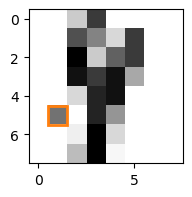

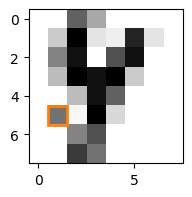

In [48]:
plt.figure(figsize = (2,2))
plt.imshow(new_test3[0].reshape(8,8),cmap='Greys')
plt.gca().add_patch(plt.Rectangle([0.5, 4.5], 1, 1, color = 'none', ec = 'C1', linewidth = 2 ))

plt.figure(figsize = (2,2))
plt.imshow(new_test3[1].reshape(8,8),cmap='Greys')
plt.gca().add_patch(plt.Rectangle([0.5, 4.5], 1, 1, color = 'none', ec = 'C1', linewidth = 2 ))

ii) Find (at least one) single pixel manipulation of each of the first two images that change the predictions from 9 to 8.  Visualize the images, indicating the location of the altered pixel in each.

In [49]:
max_val = np.argwhere(logreg_ovr.coef_[8] == logreg_ovr.coef_[8].max())[0][0]
print(max_val)
min_val = np.argwhere(logreg_ovr.coef_[8] == logreg_ovr.coef_[8].min())[0][0]
print(min_val)

8
38


In [50]:
new_test3 = np.copy(test3)
new_test3[0][max_val]

0.0

In [51]:
for i in range(16 - int(new_test3[0][max_val])):
    new_test3[0][max_val] += 1
    if logreg_ovr.predict(new_test3)[0] == 4:
        # print(new_test3[0][max_val])
        # print(i+1)
        break
        
for i in range(16 - int(new_test3[1][max_val])):
    new_test3[1][max_val] += 1
    if logreg_ovr.predict(new_test3)[1] == 4:
        break

print(new_test3[0][max_val])

print(new_test3[1][max_val])


new_test3[0]
print(f'new pred 1: {logreg_ovr.predict(new_test3)[0]}')
print(f'new pred 2: {logreg_ovr.predict(new_test3)[1]}')

16.0
16.0
new pred 1: 8
new pred 2: 8


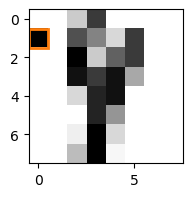

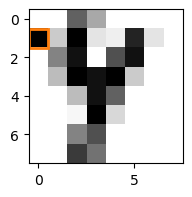

In [52]:
plt.figure(figsize = (2,2))
plt.imshow(new_test3[0].reshape(8,8),cmap='Greys')
plt.gca().add_patch(plt.Rectangle([-.5, .5], 1, 1, color = 'none', ec = 'C1', linewidth = 2 ))

plt.figure(figsize = (2,2))
plt.imshow(new_test3[1].reshape(8,8),cmap='Greys')
plt.gca().add_patch(plt.Rectangle([-.5, .5], 1, 1, color = 'none', ec = 'C1', linewidth = 2 ))

iii) It turns out that there are six distinct single pixel manipulations that correct the prediction of the third image from 8 to 3. Three are relatively easy to find using the methodology described above. Find three distinct pixel manipulations and visualize as in part i)

In [53]:
new_test3 = np.copy(test3)
sorted_coef = np.sort(logreg_ovr.coef_[3])
highest_vals = sorted_coef[[0,1,-1]]
highest_vals

array([-1.34080722, -0.9268312 ,  1.02636483])

In [54]:
neg1_val = np.argwhere(logreg_ovr.coef_[3] == highest_vals[0])[0][0]
neg2_val = np.argwhere(logreg_ovr.coef_[3] == highest_vals[1])[0][0]
pos1_val = np.argwhere(logreg_ovr.coef_[3] == highest_vals[2])[0][0]

vals = neg1_val, neg2_val, pos1_val

new pred: 3
K: 5.0
j:  5
new pred: 3
K: 2.0
j:  6
new pred: 3
K: 16.0
j:  5


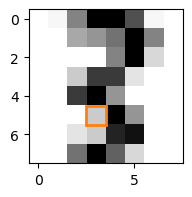

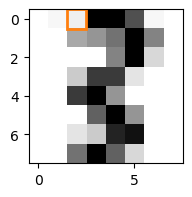

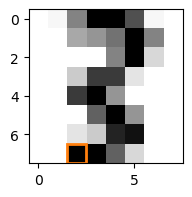

In [55]:
for i,k in zip(highest_vals, vals):
    if i > 0:
        for j in range(16):
            new_test3[2][k] += 1
            if logreg_ovr.predict(new_test3)[2] == 3:
                print(f'new pred: {logreg_ovr.predict(new_test3)[2]}')
                print(f'K: {new_test3[2][k]}')
                print(f'j:  {j}')
                break
    else:
        for j in range(16):
            new_test3[2][k] -= 1
            if logreg_ovr.predict(new_test3)[2] == 3:
                print(f'new pred: {logreg_ovr.predict(new_test3)[2]}')
                print(f'K: {new_test3[2][k]}')
                print(f'j:  {j}')
                break
    plt.figure(figsize = (2,2))
    plt.imshow(new_test3[2].reshape(8,8),cmap='Greys')
    plt.gca().add_patch(plt.Rectangle([(k%8-.5), (k//8 - .5)], 1, 1, color = 'none', ec = 'C1', linewidth = 2 ))
    
    new_test3 = np.copy(test3)

iv) [Bonus] Find the other three, i.e., find all six of the single pixel manipulations that will correct the prediction of the third image from 8 to 3, and visualize.

**C.** Now let's check how those probabilities are calculated. `logreg_ovr.predict_proba([X_test[43]])` gives the probabilities that the first test image is each of the ten digits (as indicated above, the highest is for 9, which does not give correctly the labelled value `y_test[43]` for this image).  Which three digits have the highest probability for this image?

Use `logreg_ovr.coef_` and `logreg_ovr.intercept_` to calculate the values $x_i = \vec w_i \cdot \vec f + \vec b_i$ (where the 64 $\vec f$ values are given by `X_test[43]`), then plug them into the (binomial) logistic function $q(i) = 1/(1+\exp(-x_i))$. Finally, calculate the probabilities $p(i) = q(i) / \sum_{j=0}^9 q(j)$. These should agree with the values given by `logreg_ovr.predict_proba([X_test[43]])`.

In [56]:
x = np.sort(logreg_ovr.predict_proba([X_test[43]]))[0][-3:]
print("Digits with highest probability for this image:")
for i in x:
    print(np.argwhere(logreg_ovr.predict_proba([X_test[43]]) == i)[0][1])

Digits with highest probability for this image:
4
8
9


In [57]:
x_vals = logreg_ovr.coef_ @  X_test[43] + logreg_ovr.intercept_
x_vals

array([-24.89720462, -21.68270661, -18.61788454, -37.56284284,
         1.0760998 , -18.51607256, -23.89589636, -15.85514547,
         3.03679062,   4.85472504])

In [58]:
logit_vals = []
for i in x_vals:
    logit_vals.append(logit(i))
print(logit_vals)

[1.539151674009207e-11, 3.831070714115269e-10, 8.210232908342987e-09, 4.8603173876106545e-17, 0.7457551981890213, 9.090166878017359e-09, 4.189325167347363e-11, 1.3007617403136415e-07, 0.9542088018044385, 0.9922687623459171]


In [59]:
probs = []
for qi in logit_vals:
    pi = qi / np.sum(logit_vals) 
    probs.append(pi)

print(probs == logreg_ovr.predict_proba([X_test[43]]))

[[ True  True  True  True  True  True  True  True  True  True]]


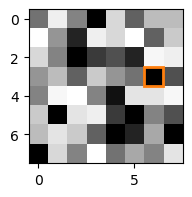

In [60]:
# Added note, one way to highlight a pixel is as follows:
plt.figure(figsize=(2,2))
plt.imshow(np.random.randint(0, 17, (8,8)), cmap='Greys', aspect=1, interpolation='none') #random pixels
plt.gca().add_patch(plt.Rectangle((5.5, 2.5), 1, 1, color='none', ec='C1', linewidth=2));